In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [41]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [42]:
# columns with their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [43]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [44]:
# distribution of continuous variables
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [45]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [46]:
# Clean the 'rate' column (convert from string 'x/5' to float)
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

In [47]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Let's do away with "," and then convert to float

In [49]:
# Clean 'approx_cost' column (remove commas and convert to numeric)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype('float32')

In [51]:
pd.DataFrame(df.isnull().sum())

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,10052
votes,0
phone,1208
location,21
rest_type,227


In [57]:
df['rest_type'].nunique()

93

with the exception of votes and approx_cost(for two people) columns, other columns 
* phone : unique for each customer
* location: 21 null values that are minimal with total rows
* rest_type: 93 unique values with 227 null values to be imputed with
 
    aren't necessary to be imputed with

In [52]:
df.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431580
std,0.440513,803.838853,438.835358
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


The distribution is right-skewed (mean >> median) for both votes and approx_cost(for two people) column, so we impute it with median.

In [58]:
# Fill missing values appropriately
df['rate'] = df['rate'].fillna(df['rate'].median())
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())
df['cuisines']=df['cuisines'].fillna('no_cuisine')

**Distribution Analysis**

Restaurant Distribution by Location

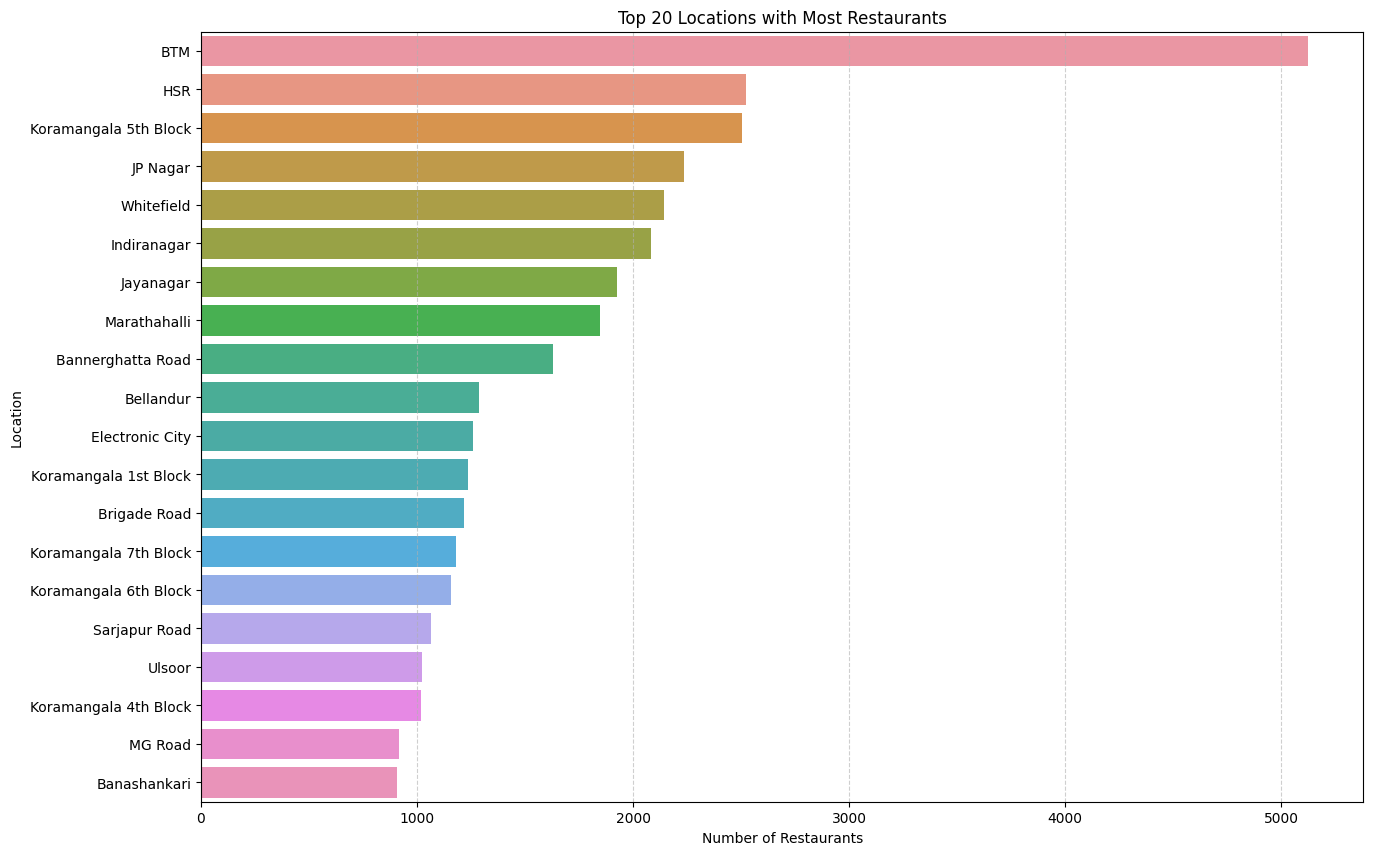

In [67]:
plt.figure(figsize=(15, 10))
top_locations = df['location'].value_counts().head(20)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 20 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Insight: Areas like BTM Layout, Koramangala, and HSR have the highest concentration of restaurants, likely due to their IT hub status and high population density

Restaurant Type Distribution

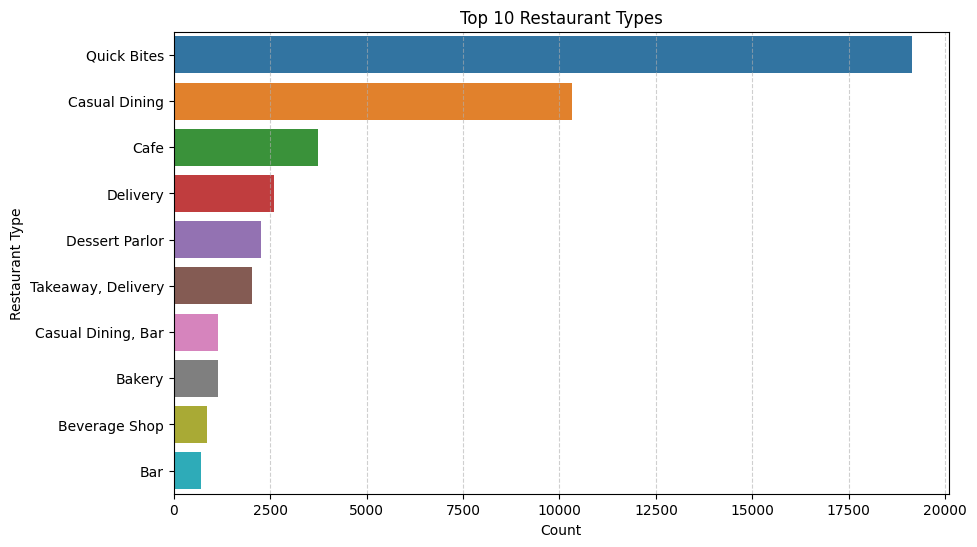

In [66]:
plt.figure(figsize=(10, 6))
top_types = df['rest_type'].value_counts().head(10)
sns.barplot(x=top_types.values, y=top_types.index)
plt.title('Top 10 Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Insight: Quick bites and casual dining dominate the market, reflecting Bengaluru's fast-paced lifestyle.

**Cuisine Analysis**

Most Popular Cuisines

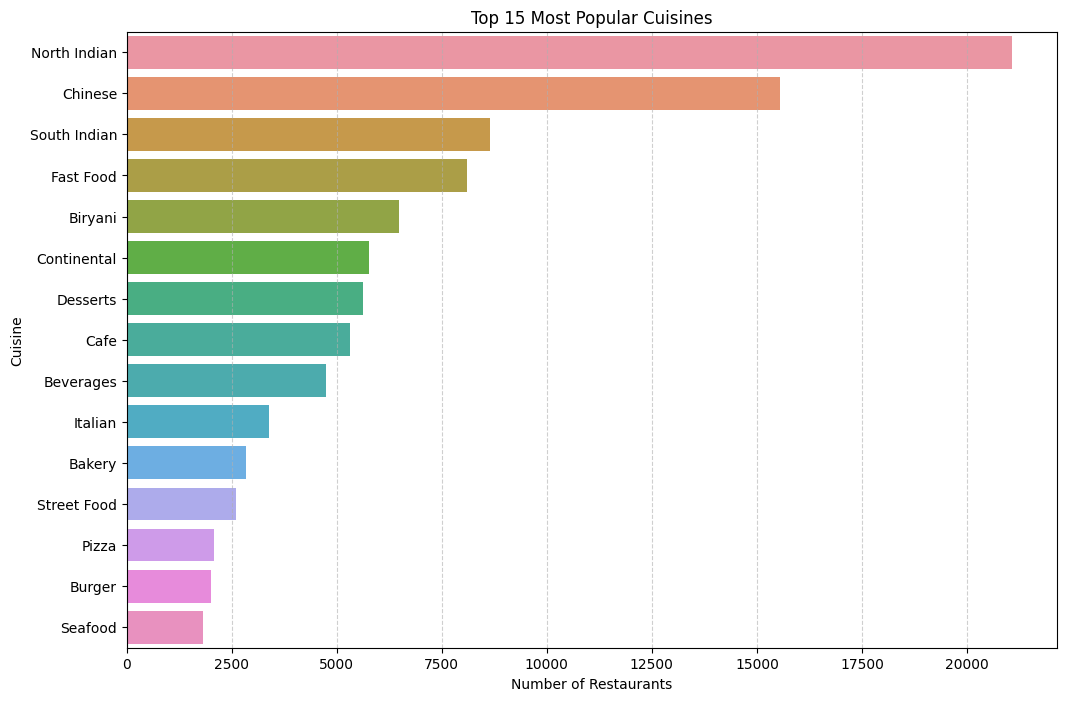

In [69]:
# Explode the cuisines column (as one restaurant can serve multiple cuisines)
cuisines = df['cuisines'].str.split(', ').explode()
top_cuisines = cuisines.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 15 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Insight: North Indian, Chinese, and South Indian cuisines are most common, with fast food and biryani also being very popular.

Most Popular Cuisines by Location

In [70]:
#  Top Locations
top_locations = df['location'].value_counts().head(10).index.tolist()
# Top Cuisines per Location
 # Split cuisines and explode into individual rows
df_exploded = df.assign(cuisines=df['cuisines'].str.split(', ')).explode('cuisines')

 # Filter for top locations and count cuisines
top_cuisines_by_location = (
    df_exploded[df_exploded['location'].isin(top_locations)]
    .groupby(['location', 'cuisines'])
    .size()
    .reset_index(name='count')
)

 # Get top 3 cuisines per location
top_3_per_location = (
    top_cuisines_by_location
    .sort_values(['location', 'count'], ascending=[True, False])
    .groupby('location')
    .head(3)
)

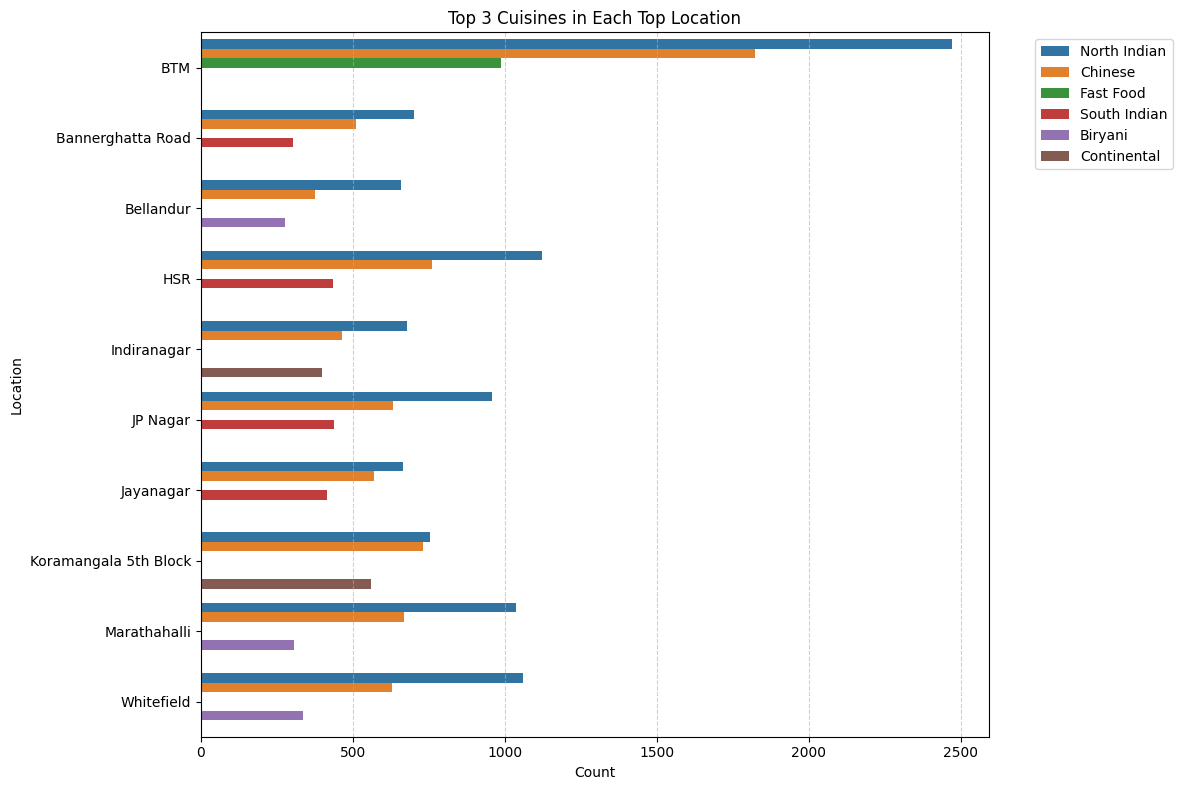

In [71]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_3_per_location,
    y='location',
    x='count',
    hue='cuisines',
    dodge=True  # Side-by-side bars
)
plt.title('Top 3 Cuisines in Each Top Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Insights: Of the top Locations, North indian followed by chinese is in higher demand.

**Pricing Analysis**

Cost Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


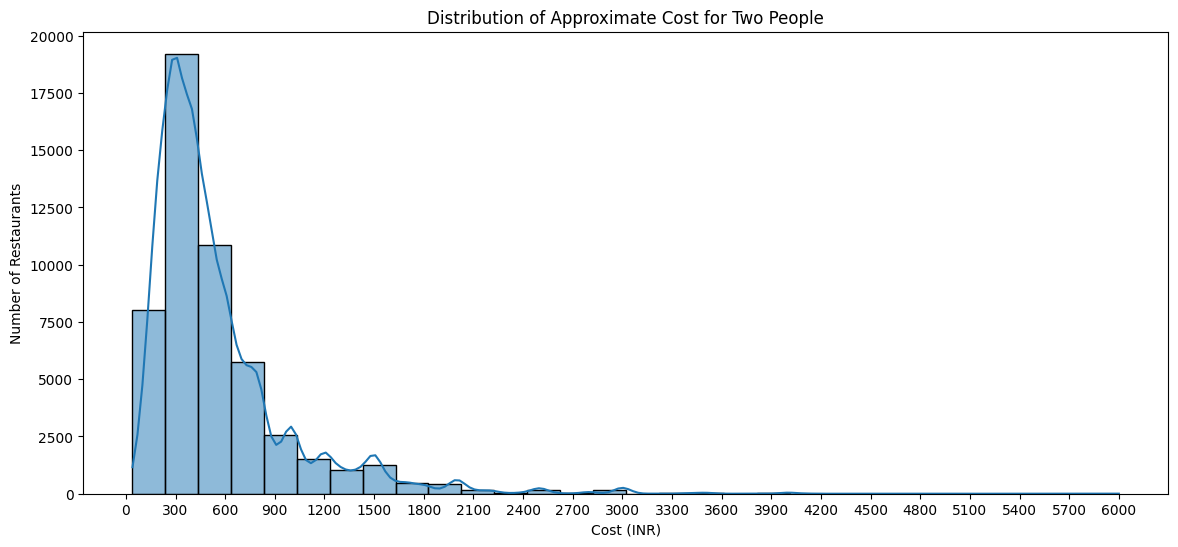

In [84]:
plt.figure(figsize=(14, 6))
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Cost (INR)')
plt.ylabel('Number of Restaurants')
# Customize x-axis ticks (increase density)
plt.xticks(np.arange(0, df['approx_cost(for two people)'].max() + 100, 300))
plt.show()

Insight: Most restaurants fall in the ₹300-₹800 range for two people, with a few premium options going beyond ₹2000.

Cost vs. Rating

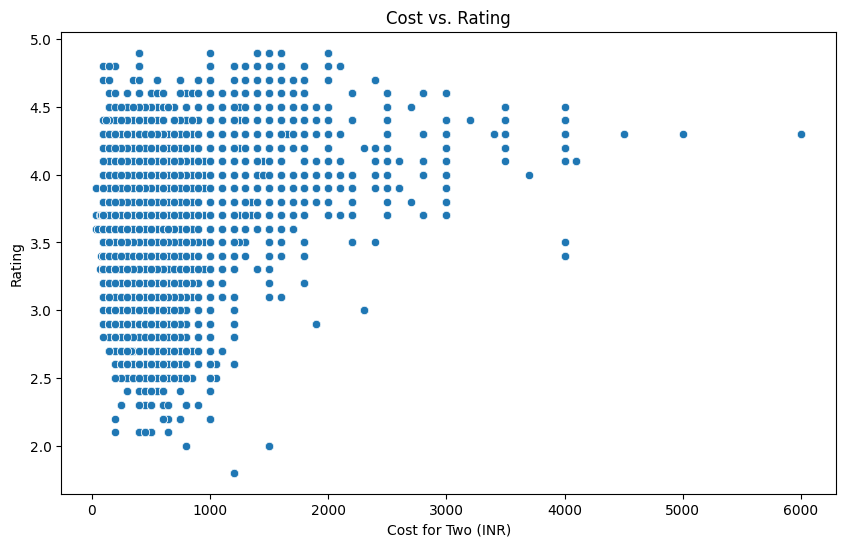

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title('Cost vs. Rating')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Rating')
plt.show()

Insight: Higher-priced restaurants generally have better ratings, but there's significant variability in the mid-range.

**Service Options Analysis**

Online Order Availability

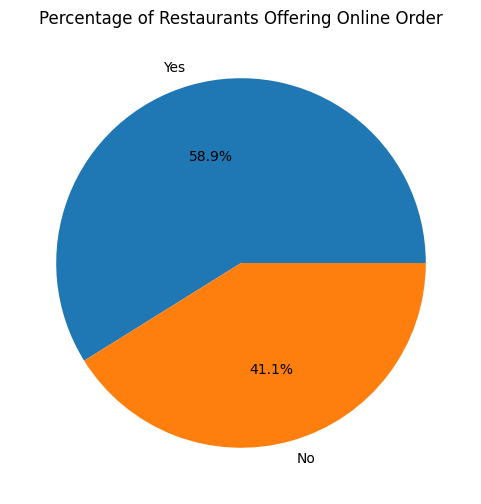

In [88]:
plt.figure(figsize=(6, 6))
df['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Restaurants Offering Online Order')
plt.ylabel('')
plt.show()

Insight: About 60% of restaurants offer online ordering, reflecting the growing demand for food delivery.

Table Booking Availability

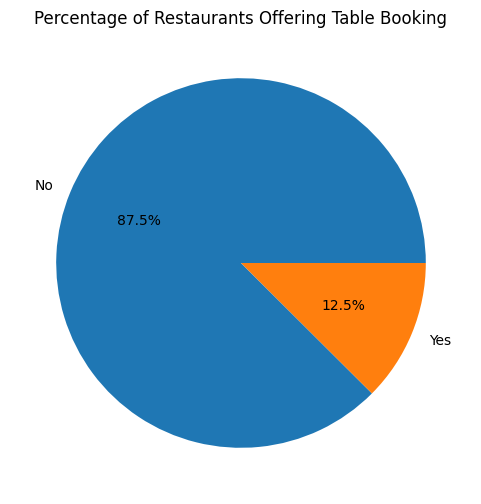

In [89]:
plt.figure(figsize=(6, 6))
df['book_table'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Restaurants Offering Table Booking')
plt.ylabel('')
plt.show()

Insight: Only about 20% of restaurants offer table booking, suggesting most are casual dining or quick service establishments.

**Rating Analysis**

Rating Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


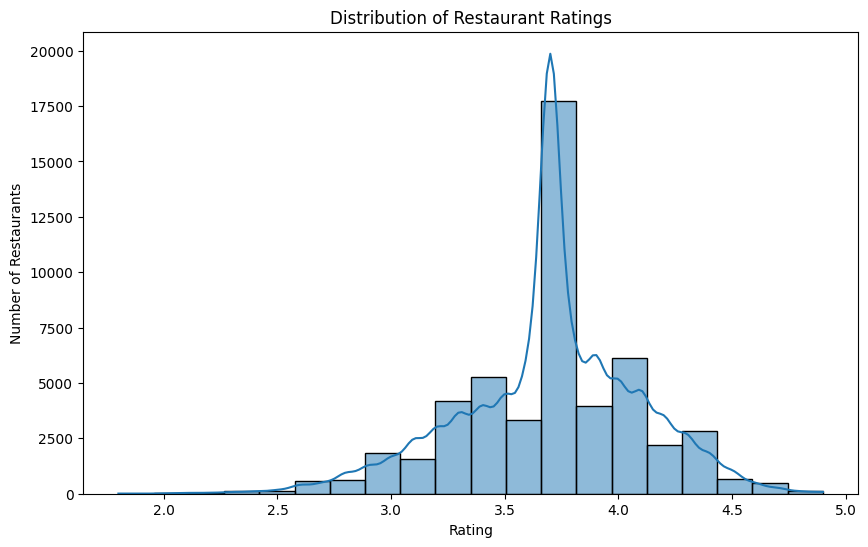

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

Insight: Ratings follow a roughly normal distribution centered around 3.5-4.0, with few restaurants getting below 2.5 or above 4.5.

Rating by Restaurant Type

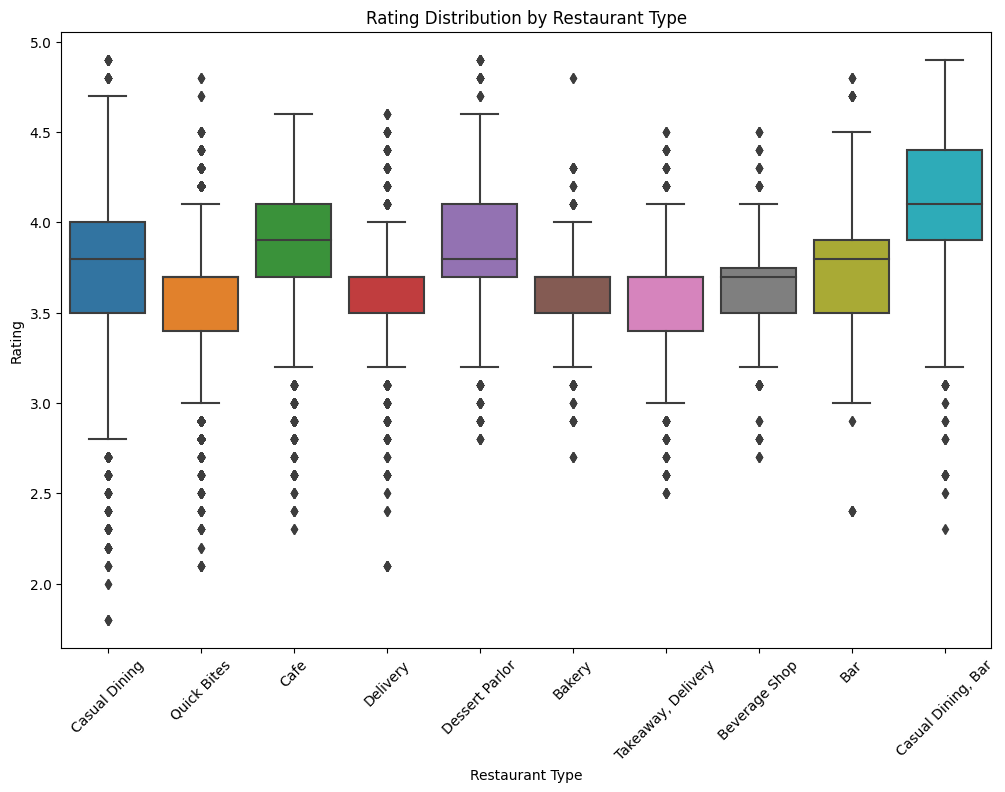

In [91]:
plt.figure(figsize=(12, 8))
top_10_types = df['rest_type'].value_counts().head(10).index
sns.boxplot(x='rest_type', y='rate', data=df[df['rest_type'].isin(top_10_types)])
plt.xticks(rotation=45)
plt.title('Rating Distribution by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.show()

Insight: Fine dining and cafe establishments tend to have higher median ratings compared to quick bites and delivery-only restaurants.

**Votes Analysis**

Votes Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


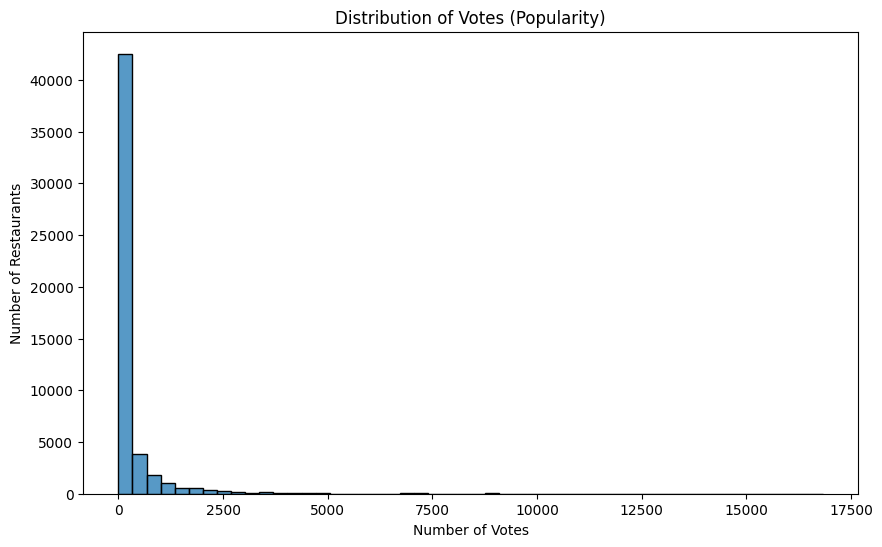

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df['votes'], bins=50)
plt.title('Distribution of Votes (Popularity)')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Restaurants')
plt.show()

Insight: Most restaurants have fewer than 1000 votes, with a few extremely popular ones gathering over 10,000 votes.

Votes vs. Rating

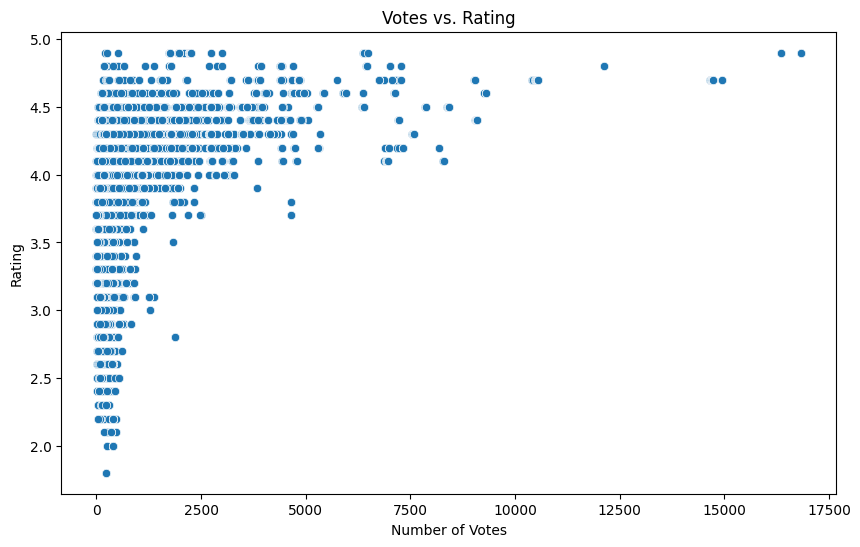

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rate', data=df)
plt.title('Votes vs. Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

Insight: Higher-rated restaurants tend to get more votes, but there's no strict correlation.

**Location-Based Insights**

Average Cost by Location

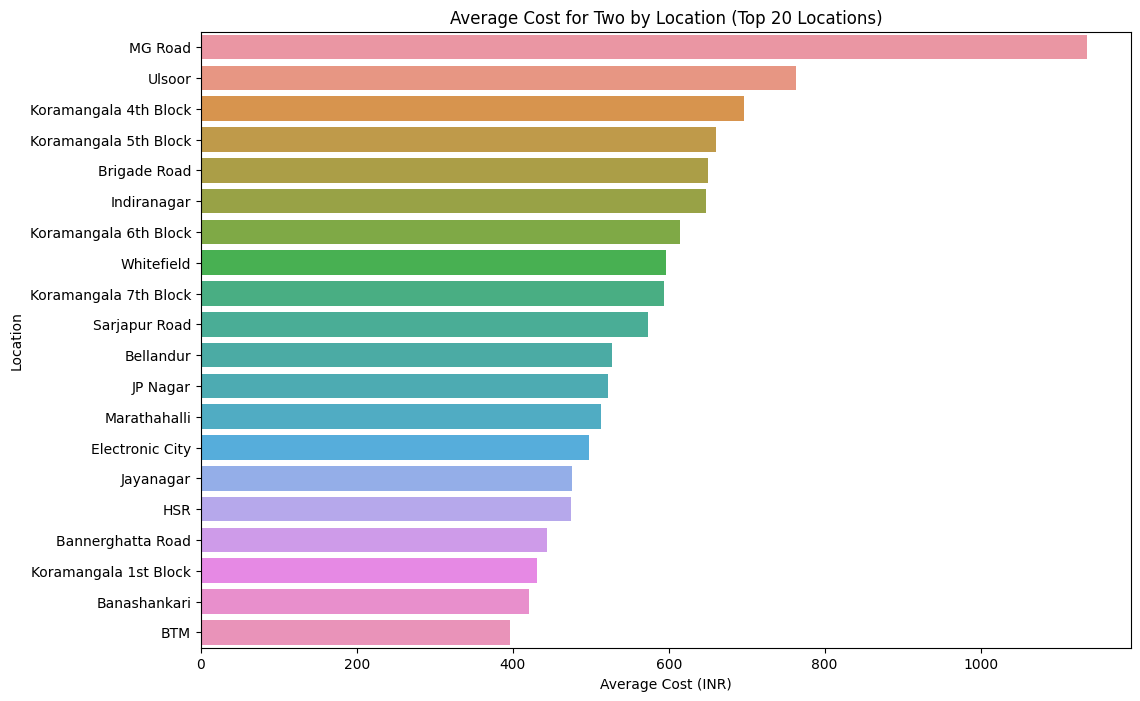

In [97]:
plt.figure(figsize=(12, 8))
top_locations = df['location'].value_counts().head(20).index
location_cost = df[df['location'].isin(top_locations)].groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False)
sns.barplot(x=location_cost.values, y=location_cost.index)
plt.title('Average Cost for Two by Location (Top 20 Locations)')
plt.xlabel('Average Cost (INR)')
plt.ylabel('Location')
plt.show()

Insight: Areas like MG Road and Indiranagar have higher average prices, while areas like BTM Layout and Koramangala 5th Block are more affordable.

Average Rating by Location

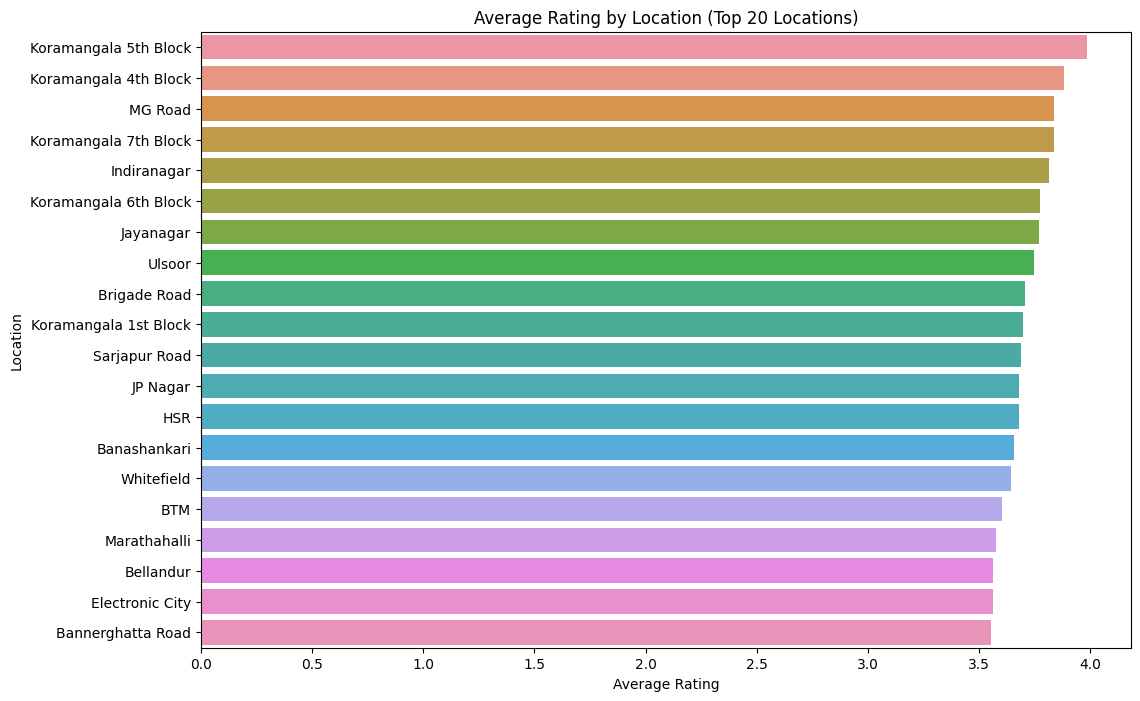

In [98]:
plt.figure(figsize=(12, 8))
location_rating = df[df['location'].isin(top_locations)].groupby('location')['rate'].mean().sort_values(ascending=False)
sns.barplot(x=location_rating.values, y=location_rating.index)
plt.title('Average Rating by Location (Top 20 Locations)')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()

Insight: Some premium locations like Lavelle Road have higher average ratings, while high-density areas with many budget options have slightly lower average ratings.

**Correlation Analysis**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


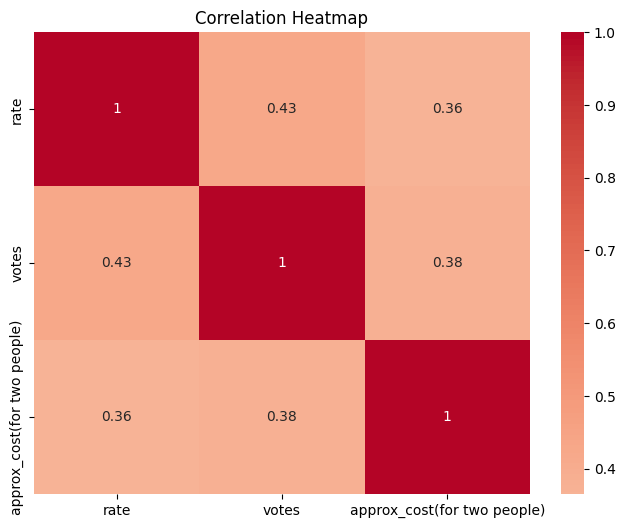

In [99]:
# Select numerical columns for correlation
numerical_df = df[['rate', 'votes', 'approx_cost(for two people)']]

# Compute correlation matrix
corr = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Insight: Moderate positive correlation between cost and rating, suggesting customers perceive higher-priced restaurants as better. Weak correlation between votes and other factors.

**Key Findings and Recommendations**


* Market Saturation: While the market is growing, competition is intense, especially in areas like BTM Layout and Koramangala.

* Pricing Strategy: The sweet spot for pricing appears to be ₹400-₹800 for two people, balancing affordability with perceived quality.

* Cuisine Opportunities: While North Indian and Chinese dominate, there may be opportunities in less saturated cuisines like Mediterranean or Korean.

* Service Differentiation: Offering online ordering is becoming table stakes, while table booking remains a differentiator for premium establishments.

* Location Selection: New restaurants should consider areas with growing populations but fewer dining options, rather than saturated markets.

* Quality Focus: Higher ratings correlate with both higher prices and more votes, emphasizing the importance of quality in building reputation.